In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
from tensorflow.keras import backend as b
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split



In [3]:
import os
path = 'C:\\Users\\luzheng\\建模\模型数据\\'
os.listdir(path)

['.ipynb_checkpoints',
 'F_Model.ipynb',
 'greatmodel_cant_use.ipynb',
 'Station_PositionPlus.h5',
 'tag_position.csv',
 '处理后无干扰的数据.csv',
 '处理后有干扰的数据.csv']

In [11]:
los = pd.read_csv(path+'处理后无干扰的数据.csv')
nlos = pd.read_csv(path+'处理后有干扰的数据.csv')
los_= los[['position1'  ,'position2' , 'position3' , 'position4','code']]
los_['los/nlos'] = 0 
nlos_ = nlos[['position1'  ,'position2' , 'position3' , 'position4','code']]
nlos_['los/nlos'] = 1
data = los_.append(nlos_)
data

,position1,position2,position3,position4,code,los/nlos
0,750.0,4550.0,4550.0,6300.0,1,0
1,750.0,4550.0,4560.0,6300.0,1,0
2,750.0,4540.0,4560.0,6310.0,1,0
3,780.0,4550.0,4550.0,6300.0,1,0
4,780.0,4550.0,4550.0,6310.0,1,0
...,...,...,...,...,...,...
26974,1390.0,4090.0,4530.0,5990.0,99,1
26975,930.0,4080.0,4520.0,6450.0,99,1
26976,930.0,4080.0,4530.0,6460.0,99,1
26977,1390.0,4090.0,4520.0,6010.0,99,1


In [12]:
tag_position = pd.read_csv(path+'tag_position.csv')
tag_position['code'] = range(1,325)

In [13]:
data_all = []
for i in data.values:
    data_all.append(list(i))
data_all

[[750.0, 4550.0, 4550.0, 6300.0, 1.0, 0.0],
 [750.0, 4550.0, 4560.0, 6300.0, 1.0, 0.0],
 [750.0, 4540.0, 4560.0, 6310.0, 1.0, 0.0],
 [780.0, 4550.0, 4550.0, 6300.0, 1.0, 0.0],
 [780.0, 4550.0, 4550.0, 6310.0, 1.0, 0.0],
 [770.0, 4560.0, 4550.0, 6310.0, 1.0, 0.0],
 [770.0, 4550.0, 4570.0, 6310.0, 1.0, 0.0],
 [770.0, 4550.0, 4560.0, 6310.0, 1.0, 0.0],
 [760.0, 4550.0, 4540.0, 6290.0, 1.0, 0.0],
 [770.0, 4550.0, 4550.0, 6280.0, 1.0, 0.0],
 [760.0, 4550.0, 4550.0, 6300.0, 1.0, 0.0],
 [750.0, 4550.0, 4570.0, 6290.0, 1.0, 0.0],
 [770.0, 4550.0, 4550.0, 6300.0, 1.0, 0.0],
 [750.0, 4560.0, 4550.0, 6300.0, 1.0, 0.0],
 [770.0, 4550.0, 4570.0, 6300.0, 1.0, 0.0],
 [770.0, 4540.0, 4570.0, 6290.0, 1.0, 0.0],
 [770.0, 4550.0, 4550.0, 6290.0, 1.0, 0.0],
 [770.0, 4540.0, 4540.0, 6300.0, 1.0, 0.0],
 [760.0, 4550.0, 4550.0, 6310.0, 1.0, 0.0],
 [740.0, 4550.0, 4570.0, 6300.0, 1.0, 0.0],
 [750.0, 4540.0, 4560.0, 6290.0, 1.0, 0.0],
 [760.0, 4540.0, 4540.0, 6290.0, 1.0, 0.0],
 [760.0, 4550.0, 4580.0, 6300.0,

In [18]:
a = data_all[1]
print(a[-2])
tag_position.iloc[int(a[-2]),2:5]

1.0


X     50
Y    100
Z     88
Name: 1, dtype: int64

In [20]:
# dict_data = {code:[]}
for n in data_all:
    n.extend(list(tag_position.iloc[int(n[-2])-1,2:5]) )
data_all

[[750.0, 4550.0, 4550.0, 6300.0, 1.0, 0.0, 50, 50, 88],
 [750.0, 4550.0, 4560.0, 6300.0, 1.0, 0.0, 50, 50, 88],
 [750.0, 4540.0, 4560.0, 6310.0, 1.0, 0.0, 50, 50, 88],
 [780.0, 4550.0, 4550.0, 6300.0, 1.0, 0.0, 50, 50, 88],
 [780.0, 4550.0, 4550.0, 6310.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4560.0, 4550.0, 6310.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4550.0, 4570.0, 6310.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4550.0, 4560.0, 6310.0, 1.0, 0.0, 50, 50, 88],
 [760.0, 4550.0, 4540.0, 6290.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4550.0, 4550.0, 6280.0, 1.0, 0.0, 50, 50, 88],
 [760.0, 4550.0, 4550.0, 6300.0, 1.0, 0.0, 50, 50, 88],
 [750.0, 4550.0, 4570.0, 6290.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4550.0, 4550.0, 6300.0, 1.0, 0.0, 50, 50, 88],
 [750.0, 4560.0, 4550.0, 6300.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4550.0, 4570.0, 6300.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4540.0, 4570.0, 6290.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4550.0, 4550.0, 6290.0, 1.0, 0.0, 50, 50, 88],
 [770.0, 4540.0, 4540.0, 6300.0, 1.0, 0.0, 50, 5

In [23]:
# data1 = pd.DataFrame(data_all)
data1.columns = ['position1'  ,'position2' , 'position3' , 'position4','code','nlos/los','X' ,'Y' , 'Z']
data1

,position1,position2,position3,position4,code,nlos/los,X,Y,Z
0,750.0,4550.0,4550.0,6300.0,1.0,0.0,50,50,88
1,750.0,4550.0,4560.0,6300.0,1.0,0.0,50,50,88
2,750.0,4540.0,4560.0,6310.0,1.0,0.0,50,50,88
3,780.0,4550.0,4550.0,6300.0,1.0,0.0,50,50,88
4,780.0,4550.0,4550.0,6310.0,1.0,0.0,50,50,88
...,...,...,...,...,...,...,...,...,...
49807,1390.0,4090.0,4530.0,5990.0,99.0,1.0,100,50,130
49808,930.0,4080.0,4520.0,6450.0,99.0,1.0,100,50,130
49809,930.0,4080.0,4530.0,6460.0,99.0,1.0,100,50,130
49810,1390.0,4090.0,4520.0,6010.0,99.0,1.0,100,50,130


In [33]:
data1[['los','nlos']] = pd.get_dummies(data1['nlos/los'])
data1

,position1,position2,position3,position4,code,nlos/los,X,Y,Z,nlos,los
0,750.0,4550.0,4550.0,6300.0,1.0,0.0,50,50,88,0,1
1,750.0,4550.0,4560.0,6300.0,1.0,0.0,50,50,88,0,1
2,750.0,4540.0,4560.0,6310.0,1.0,0.0,50,50,88,0,1
3,780.0,4550.0,4550.0,6300.0,1.0,0.0,50,50,88,0,1
4,780.0,4550.0,4550.0,6310.0,1.0,0.0,50,50,88,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49807,1390.0,4090.0,4530.0,5990.0,99.0,1.0,100,50,130,1,0
49808,930.0,4080.0,4520.0,6450.0,99.0,1.0,100,50,130,1,0
49809,930.0,4080.0,4530.0,6460.0,99.0,1.0,100,50,130,1,0
49810,1390.0,4090.0,4520.0,6010.0,99.0,1.0,100,50,130,1,0


In [38]:
data1.to_csv('就是你了.csv')

In [37]:
# data2 = data.drop(['nlos/los','code'])
station_p = [0,0,1300,5000,0,1700,0,5000,1700,5000,5000,1300]
data1[['A01','A02','A03','A11','A12','A13','A21','A22','A23','A31','A32','A33']]=station_p
data1

,position1,position2,position3,position4,code,nlos/los,X,Y,Z,nlos,...,A03,A11,A12,A13,A21,A22,A23,A31,A32,A33
0,750.0,4550.0,4550.0,6300.0,1.0,0.0,50,50,88,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
1,750.0,4550.0,4560.0,6300.0,1.0,0.0,50,50,88,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
2,750.0,4540.0,4560.0,6310.0,1.0,0.0,50,50,88,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
3,780.0,4550.0,4550.0,6300.0,1.0,0.0,50,50,88,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
4,780.0,4550.0,4550.0,6310.0,1.0,0.0,50,50,88,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49807,1390.0,4090.0,4530.0,5990.0,99.0,1.0,100,50,130,1,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
49808,930.0,4080.0,4520.0,6450.0,99.0,1.0,100,50,130,1,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
49809,930.0,4080.0,4530.0,6460.0,99.0,1.0,100,50,130,1,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
49810,1390.0,4090.0,4520.0,6010.0,99.0,1.0,100,50,130,1,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300


In [53]:
# data2 = data1.drop(['code' ,'nlos/los'],axis=1)
data2

,position1,position2,position3,position4,X,Y,Z,nlos,los,A01,...,A03,A11,A12,A13,A21,A22,A23,A31,A32,A33
0,750.0,4550.0,4550.0,6300.0,50,50,88,0,1,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
1,750.0,4550.0,4560.0,6300.0,50,50,88,0,1,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
2,750.0,4540.0,4560.0,6310.0,50,50,88,0,1,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
3,780.0,4550.0,4550.0,6300.0,50,50,88,0,1,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
4,780.0,4550.0,4550.0,6310.0,50,50,88,0,1,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49807,1390.0,4090.0,4530.0,5990.0,100,50,130,1,0,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
49808,930.0,4080.0,4520.0,6450.0,100,50,130,1,0,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
49809,930.0,4080.0,4530.0,6460.0,100,50,130,1,0,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300
49810,1390.0,4090.0,4520.0,6010.0,100,50,130,1,0,0,...,1300,5000,0,1700,0,5000,1700,5000,5000,1300


In [59]:
# from sklearn.preprocessing import StandardScaler , RobustScaler
# rob = RobustScaler()
# data3 = data2.copy()
# scaled= rob.fit_transform(data3[['position1','position2','position3' , 'position4']])
# data3[['position1'  ,'position2' ,'position3' , 'position4']] = scaled
a = ['A01','A02','A03','A11','A12','A13','A21','A22','A23','A31','A32','A33']
data3[a] = data3[a].values/1000
data3

,position1,position2,position3,position4,X,Y,Z,nlos,los,A01,...,A03,A11,A12,A13,A21,A22,A23,A31,A32,A33
0,-1.735135,0.302703,0.302703,1.248649,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
1,-1.735135,0.302703,0.308108,1.248649,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
2,-1.735135,0.297297,0.308108,1.254054,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
3,-1.718919,0.302703,0.302703,1.248649,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
4,-1.718919,0.302703,0.302703,1.254054,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49807,-1.389189,0.054054,0.291892,1.081081,100,50,130,1,0,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
49808,-1.637838,0.048649,0.286486,1.329730,100,50,130,1,0,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
49809,-1.637838,0.048649,0.291892,1.335135,100,50,130,1,0,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
49810,-1.389189,0.054054,0.286486,1.091892,100,50,130,1,0,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3


In [48]:
data3 = pd.DataFrame(data_scaled)
data3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.735135,0.302703,0.302703,1.248649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.735135,0.302703,0.308108,1.248649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.735135,0.297297,0.308108,1.254054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.718919,0.302703,0.302703,1.248649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.718919,0.302703,0.302703,1.254054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49807,-1.389189,0.054054,0.291892,1.081081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49808,-1.637838,0.048649,0.286486,1.329730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49809,-1.637838,0.048649,0.291892,1.335135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49810,-1.389189,0.054054,0.286486,1.091892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
data = pd.read_csv('搞过的数据.csv')
data.head()
data.drop(data.columns[0],axis=1,inplace =True)
data.head()

,position1,position2,position3,position4,X,Y,Z,nlos,los,A01,...,A03,A11,A12,A13,A21,A22,A23,A31,A32,A33
0,-1.735135,0.302703,0.302703,1.248649,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
1,-1.735135,0.302703,0.308108,1.248649,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
2,-1.735135,0.297297,0.308108,1.254054,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
3,-1.718919,0.302703,0.302703,1.248649,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3
4,-1.718919,0.302703,0.302703,1.254054,50,50,88,0,1,0.0,...,1.3,5.0,0.0,1.7,0.0,5.0,1.7,5.0,5.0,1.3


In [36]:
X = data.drop(['X','Y','Z'],axis=1)
y = data[['X','Y','Z']]

x_train , x_test , y_train , y_test = train_test_split(X , y , train_size=0.8 )

n_inputs = x_train.shape[1]
model = Sequential([
    Dense(n_inputs , input_shape=(n_inputs, ) , activation = 'relu'),
    Dense(128 , activation = 'relu'),
    Dense(256 , activation = 'relu'),
    Dense(256 , activation = 'relu'),
    Dense(512),
    Dense(3)
])


In [44]:
model.compile(Adam(lr=0.0001) , loss = 'mean_squared_error')
history2 = model.fit(x_train , y_train , validation_split=0.2 ,  epochs=230 ,
          batch_size=64 ,shuffle=True , verbose=2
         )

Epoch 1/230
499/499 - 2s - loss: 15.7261 - val_loss: 28.4317
Epoch 2/230
499/499 - 1s - loss: 14.5000 - val_loss: 29.8948
Epoch 3/230
499/499 - 1s - loss: 14.1091 - val_loss: 31.6073
Epoch 4/230
499/499 - 1s - loss: 14.0290 - val_loss: 27.6450
Epoch 5/230
499/499 - 1s - loss: 13.6901 - val_loss: 28.0685
Epoch 6/230
499/499 - 1s - loss: 13.5971 - val_loss: 27.7399
Epoch 7/230
499/499 - 1s - loss: 13.5684 - val_loss: 28.9958
Epoch 8/230
499/499 - 1s - loss: 13.3654 - val_loss: 27.6114
Epoch 9/230
499/499 - 1s - loss: 13.6085 - val_loss: 27.7696
Epoch 10/230
499/499 - 1s - loss: 13.1402 - val_loss: 28.8932
Epoch 11/230
499/499 - 1s - loss: 13.1921 - val_loss: 27.3647
Epoch 12/230
499/499 - 1s - loss: 13.2493 - val_loss: 27.3907
Epoch 13/230
499/499 - 1s - loss: 12.9207 - val_loss: 27.2715
Epoch 14/230
499/499 - 1s - loss: 12.8925 - val_loss: 28.9752
Epoch 15/230
499/499 - 1s - loss: 13.1022 - val_loss: 27.0057
Epoch 16/230
499/499 - 1s - loss: 12.6907 - val_loss: 28.8277
Epoch 17/230
499/

Epoch 134/230
499/499 - 1s - loss: 9.3271 - val_loss: 25.3563
Epoch 135/230
499/499 - 1s - loss: 9.4322 - val_loss: 24.6187
Epoch 136/230
499/499 - 1s - loss: 9.1418 - val_loss: 25.3958
Epoch 137/230
499/499 - 1s - loss: 9.2255 - val_loss: 24.5918
Epoch 138/230
499/499 - 1s - loss: 9.1004 - val_loss: 24.5067
Epoch 139/230
499/499 - 1s - loss: 8.9521 - val_loss: 24.0378
Epoch 140/230
499/499 - 1s - loss: 9.0160 - val_loss: 24.8643
Epoch 141/230
499/499 - 1s - loss: 9.1528 - val_loss: 25.5585
Epoch 142/230
499/499 - 1s - loss: 9.1739 - val_loss: 24.7306
Epoch 143/230
499/499 - 1s - loss: 8.9282 - val_loss: 24.7068
Epoch 144/230
499/499 - 1s - loss: 8.9820 - val_loss: 26.3794
Epoch 145/230
499/499 - 1s - loss: 9.1759 - val_loss: 24.6406
Epoch 146/230
499/499 - 1s - loss: 8.9193 - val_loss: 24.1681
Epoch 147/230
499/499 - 1s - loss: 8.9230 - val_loss: 24.4728
Epoch 148/230
499/499 - 1s - loss: 8.8677 - val_loss: 24.5833
Epoch 149/230
499/499 - 1s - loss: 8.9782 - val_loss: 24.7790
Epoch 15

In [42]:
history1.history

{'loss': [4297.74365234375,
  725.0604858398438,
  719.7911987304688,
  716.2831420898438,
  700.901123046875,
  694.7728271484375,
  679.3297119140625,
  667.3506469726562,
  659.3338012695312,
  644.203857421875,
  627.7294311523438,
  611.47509765625,
  590.7922973632812,
  571.3253784179688,
  544.3013916015625,
  501.6880798339844,
  478.1087951660156,
  465.8932189941406,
  448.9718933105469,
  446.8619079589844,
  427.55682373046875,
  423.1111755371094,
  404.66876220703125,
  388.743896484375,
  376.714599609375,
  357.4793701171875,
  346.87420654296875,
  336.9086608886719,
  321.0857849121094,
  314.1409912109375,
  305.04779052734375,
  295.4932861328125,
  285.159423828125,
  281.7737121582031,
  269.929443359375,
  263.7678527832031,
  260.3634033203125,
  245.4005126953125,
  240.8203887939453,
  237.45205688476562,
  234.3520050048828,
  221.96923828125,
  219.26397705078125,
  212.1226348876953,
  205.19436645507812,
  198.69113159179688,
  198.66256713867188,
  192.9

In [51]:
history2.history['loss']

[15.726093292236328,
 14.499985694885254,
 14.109053611755371,
 14.029006958007812,
 13.690107345581055,
 13.597077369689941,
 13.568425178527832,
 13.365425109863281,
 13.60854434967041,
 13.140195846557617,
 13.19205093383789,
 13.249346733093262,
 12.920700073242188,
 12.892525672912598,
 13.102178573608398,
 12.690668106079102,
 12.709870338439941,
 12.701794624328613,
 12.578763961791992,
 12.810942649841309,
 12.519551277160645,
 12.535126686096191,
 12.311894416809082,
 12.516581535339355,
 12.302477836608887,
 12.2915620803833,
 12.26794147491455,
 12.252884864807129,
 12.105562210083008,
 11.957803726196289,
 11.951433181762695,
 11.999032020568848,
 11.802736282348633,
 12.056466102600098,
 12.154635429382324,
 11.909627914428711,
 11.785994529724121,
 11.818883895874023,
 11.778895378112793,
 11.842168807983398,
 11.527665138244629,
 11.606667518615723,
 11.720901489257812,
 11.519709587097168,
 11.461763381958008,
 11.418221473693848,
 11.559427261352539,
 11.62983417510986

In [52]:
import seaborn as sns
a= history1.history['loss']
a1 =history2.history['loss']
a.extend(a1)
                                   
b = history1.history['val_loss']
b1 = history2.history['val_loss']
b.extend(b1)
a

[4297.74365234375,
 725.0604858398438,
 719.7911987304688,
 716.2831420898438,
 700.901123046875,
 694.7728271484375,
 679.3297119140625,
 667.3506469726562,
 659.3338012695312,
 644.203857421875,
 627.7294311523438,
 611.47509765625,
 590.7922973632812,
 571.3253784179688,
 544.3013916015625,
 501.6880798339844,
 478.1087951660156,
 465.8932189941406,
 448.9718933105469,
 446.8619079589844,
 427.55682373046875,
 423.1111755371094,
 404.66876220703125,
 388.743896484375,
 376.714599609375,
 357.4793701171875,
 346.87420654296875,
 336.9086608886719,
 321.0857849121094,
 314.1409912109375,
 305.04779052734375,
 295.4932861328125,
 285.159423828125,
 281.7737121582031,
 269.929443359375,
 263.7678527832031,
 260.3634033203125,
 245.4005126953125,
 240.8203887939453,
 237.45205688476562,
 234.3520050048828,
 221.96923828125,
 219.26397705078125,
 212.1226348876953,
 205.19436645507812,
 198.69113159179688,
 198.66256713867188,
 192.99073791503906,
 185.07131958007812,
 188.5816192626953,


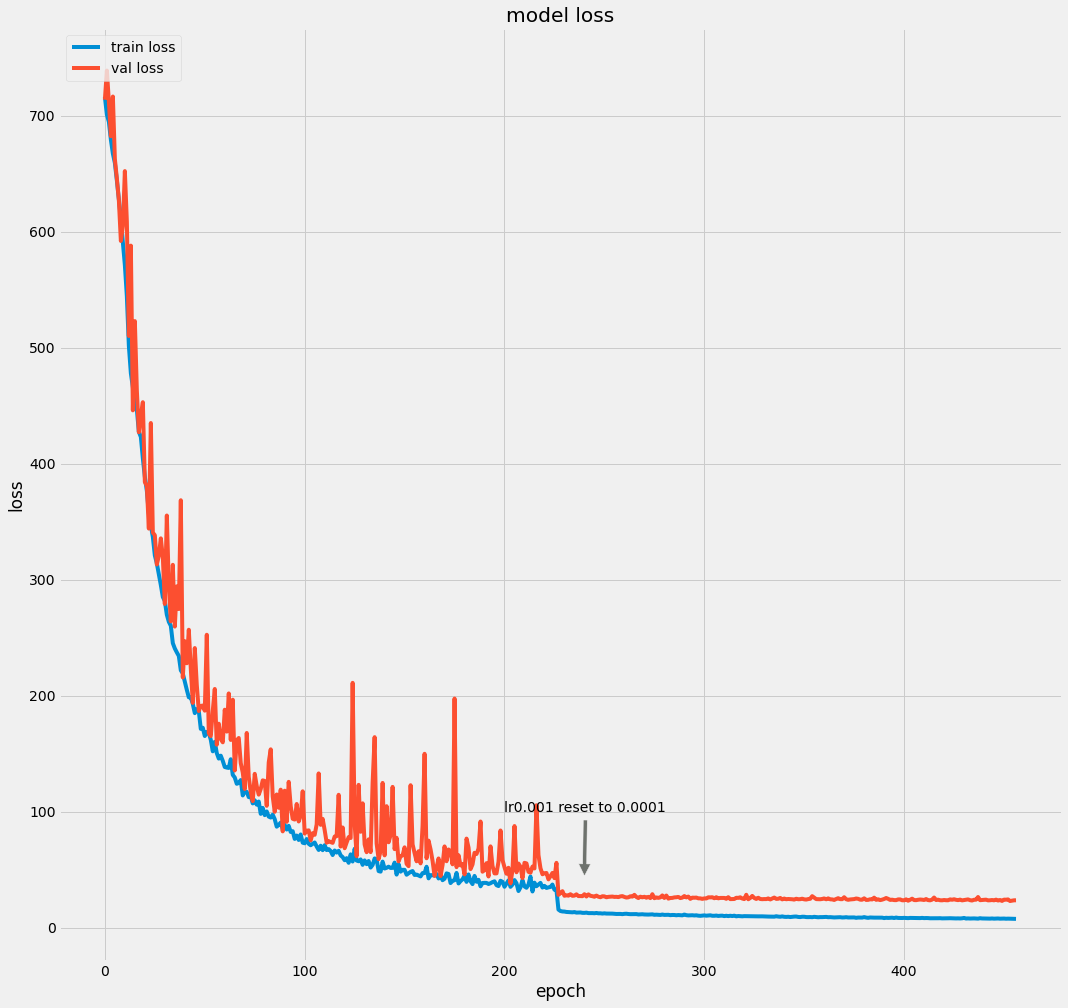

In [64]:
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16,16))
plt.plot(a[3:])
plt.plot(b[3:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.annotate('lr0.001 reset to 0.0001', xy=(240, 42), xytext=(200, 100),
 arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

In [76]:
df.dropna(axis=0,inplace = True)
y = df[['X','Y','Z']]
y_pred = df[['pre_X' ,'pre_Y' ,'pre_Z']]

mean_squared_error(y,y_pred)

157.1522187770749

In [75]:
df.isnull().sum()

Unnamed: 0     0
num            0
position1      0
position2      0
position3      0
position4      0
code           0
X              0
Y              0
Z             69
pre_X          0
pre_Y          0
pre_Z          0
dtype: int64

In [78]:
model.save('位置预测加上classification.h5')

In [53]:
history

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
from tensorflow.keras import backend as b
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
data = pd.read_csv('搞过的数据.csv')
data.head()
X = data3.drop(['X','Y','Z'],axis=1)
y = data3[['X','Y','Z']]

x_train , x_test , y_train , y_test = train_test_split(X , y , train_size=0.8 )

n_inputs = x_train.shape[1]
model = Sequential([
    Dense(n_inputs , input_shape=(n_inputs, ) , activation = 'relu'),
    Dense(128 , activation = 'relu'),
    Dense(256 , activation = 'relu'),
    Dense(256 , activation = 'relu'),
    Dense(512)
    Dense(3)
])
X = data3.drop(['X','Y','Z'],axis=1)
y = data3[['X','Y','Z']]

x_train , x_test , y_train , y_test = train_test_s